# A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


## Data Description:

- Sales : Unit sales (in thousands) at each location
- Competitor Price : Price charged by competitor at each location
- Income : Community income level (in thousands of dollars)
- Advertising : Local advertising budget for company at each location (in thousands of dollars)
- Population : Population size in region (in thousands)
- Price : Price company charges for car seats at each site
- Shelf Location at stores : A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
- Age : Average age of the local population
- Education : Education level at each location
- Urban : A factor with levels No and Yes to indicate whether the store is in an urban or rural location
- US : A factor with levels No and Yes to indicate whether the store is in the US or not

## Attaching Resources

### Importing Necessary Libraries

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, r2_score
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

### Adding Dataset

In [51]:
cd = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Data-Science-Assignments/main/Assignment_15_Random%20Forests/Dataset/Company_Data.csv')

cd

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [52]:
cd_nrow = cd.shape[0]

In [53]:
def lost_record():

    cd_nrow_now = cd.shape[0]
    lost = cd_nrow - cd_nrow_now
    lost = (lost/cd_nrow)*100
    lost = round(lost, 2)

    return print('We lost ' + str(lost) + ' % data')


## Performing EDA In Dataset

### Applying Descriptive Statistics

In [54]:
cd.describe()


Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [55]:
cd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [56]:
cd.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [57]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
              str(len(df[df.columns[i]].unique())))


In [58]:
uni(cd)


 All Unique Value in Sales
[ 0.    0.16  0.37  0.53  0.91  1.42  1.82  2.05  2.07  2.23  2.34  2.52
  2.66  2.67  2.86  2.93  2.99  3.02  3.07  3.13  3.15  3.24  3.42  3.45
  3.47  3.58  3.62  3.63  3.67  3.72  3.89  3.9   3.91  3.98  4.1   4.11
  4.12  4.15  4.16  4.17  4.19  4.2   4.21  4.34  4.36  4.38  4.42  4.43
  4.47  4.53  4.55  4.56  4.62  4.67  4.68  4.69  4.74  4.78  4.81  4.83
  4.88  4.9   4.94  4.95  4.96  4.97  4.99  5.01  5.04  5.05  5.07  5.08
  5.12  5.16  5.17  5.21  5.25  5.27  5.28  5.3   5.31  5.32  5.33  5.35
  5.36  5.4   5.42  5.47  5.52  5.53  5.55  5.56  5.57  5.58  5.61  5.64
  5.68  5.71  5.73  5.74  5.81  5.83  5.86  5.87  5.9   5.93  5.94  5.97
  5.98  5.99  6.01  6.03  6.1   6.11  6.14  6.15  6.18  6.2   6.23  6.37
  6.38  6.39  6.41  6.42  6.43  6.44  6.5   6.52  6.53  6.54  6.56  6.59
  6.62  6.63  6.64  6.67  6.68  6.71  6.8   6.81  6.85  6.87  6.88  6.89
  6.9   6.92  6.93  6.95  6.97  6.98  7.02  7.22  7.23  7.3   7.32  7.36
  7.37  7.38  7.4   7.4

### Checking for Duplicated Values

In [59]:
cd[cd.duplicated()]

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []

- There is no duplicate vale in are dataset

### Visualizing The Data

#### Ploting Boxplot

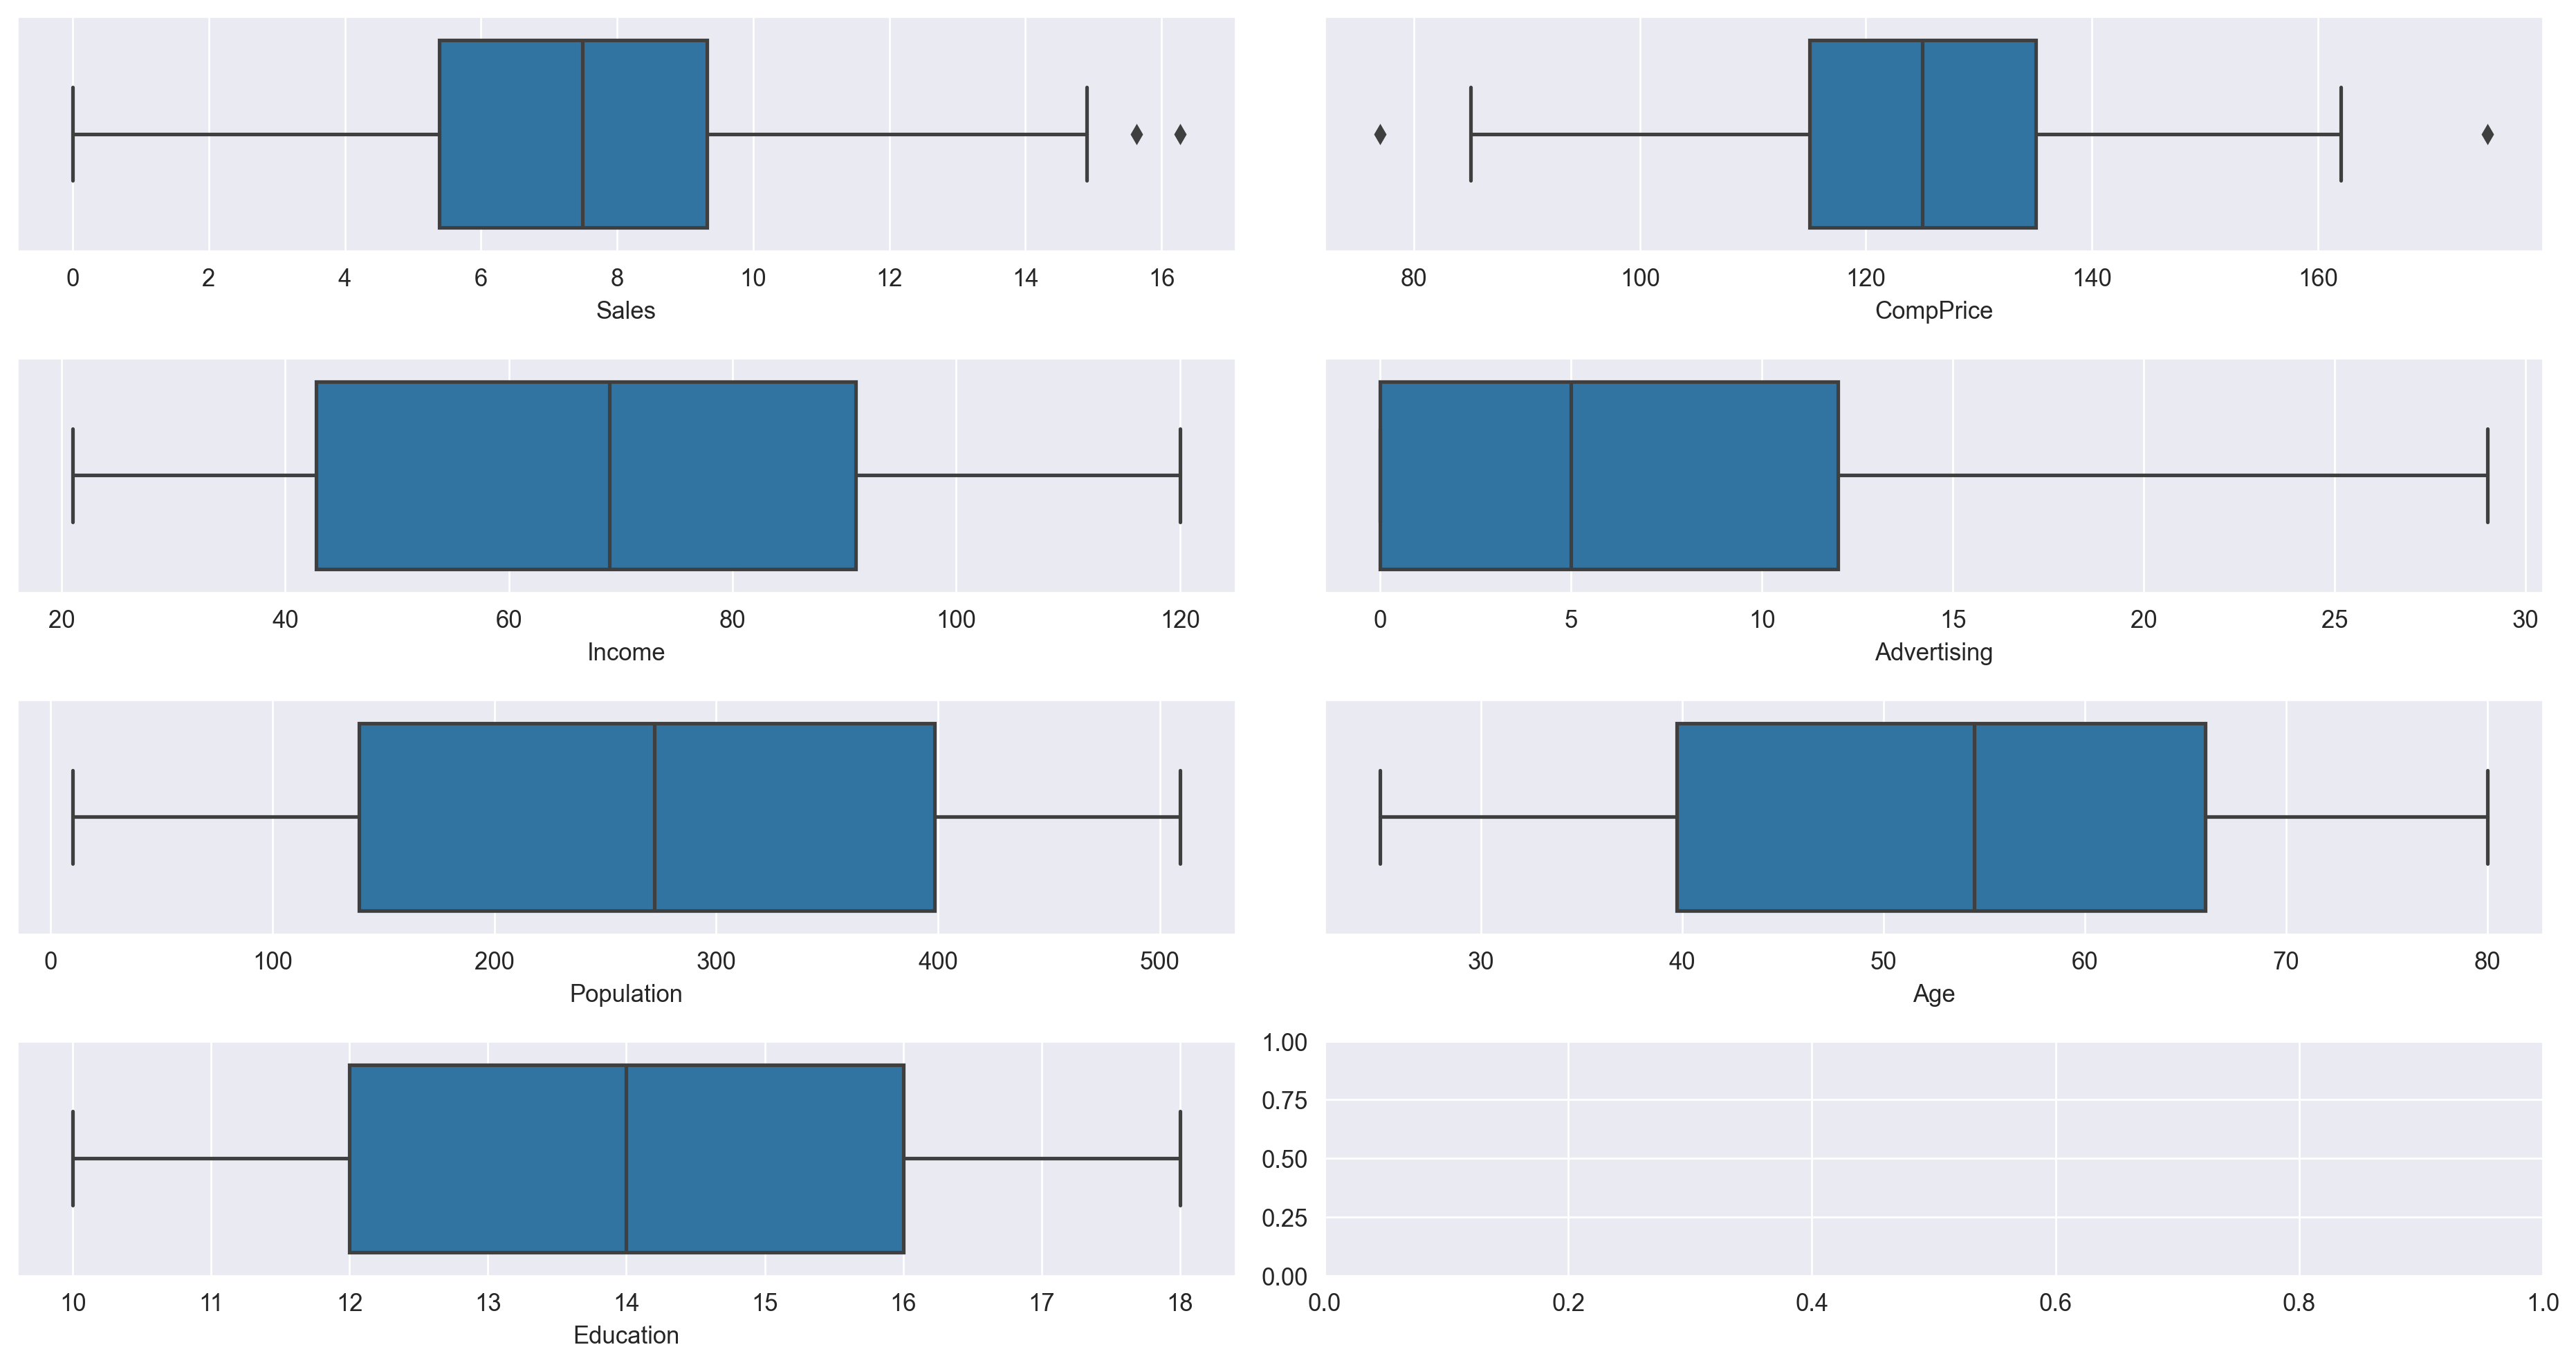

In [60]:
fig, ax = plt.subplots(4, 2)

sns.boxplot(cd['Sales'], ax = ax[0, 0])
sns.boxplot(cd['CompPrice'], ax = ax[0, 1])
sns.boxplot(cd['Income'], ax = ax[1, 0])
sns.boxplot(cd['Advertising'], ax = ax[1, 1])
sns.boxplot(cd['Population'], ax =  ax[2, 0])
sns.boxplot(cd['Age'], ax = ax[2, 1])
sns.boxplot(cd['Education'], ax = ax[3, 0])

plt.tight_layout()


#### Ploting Histplot

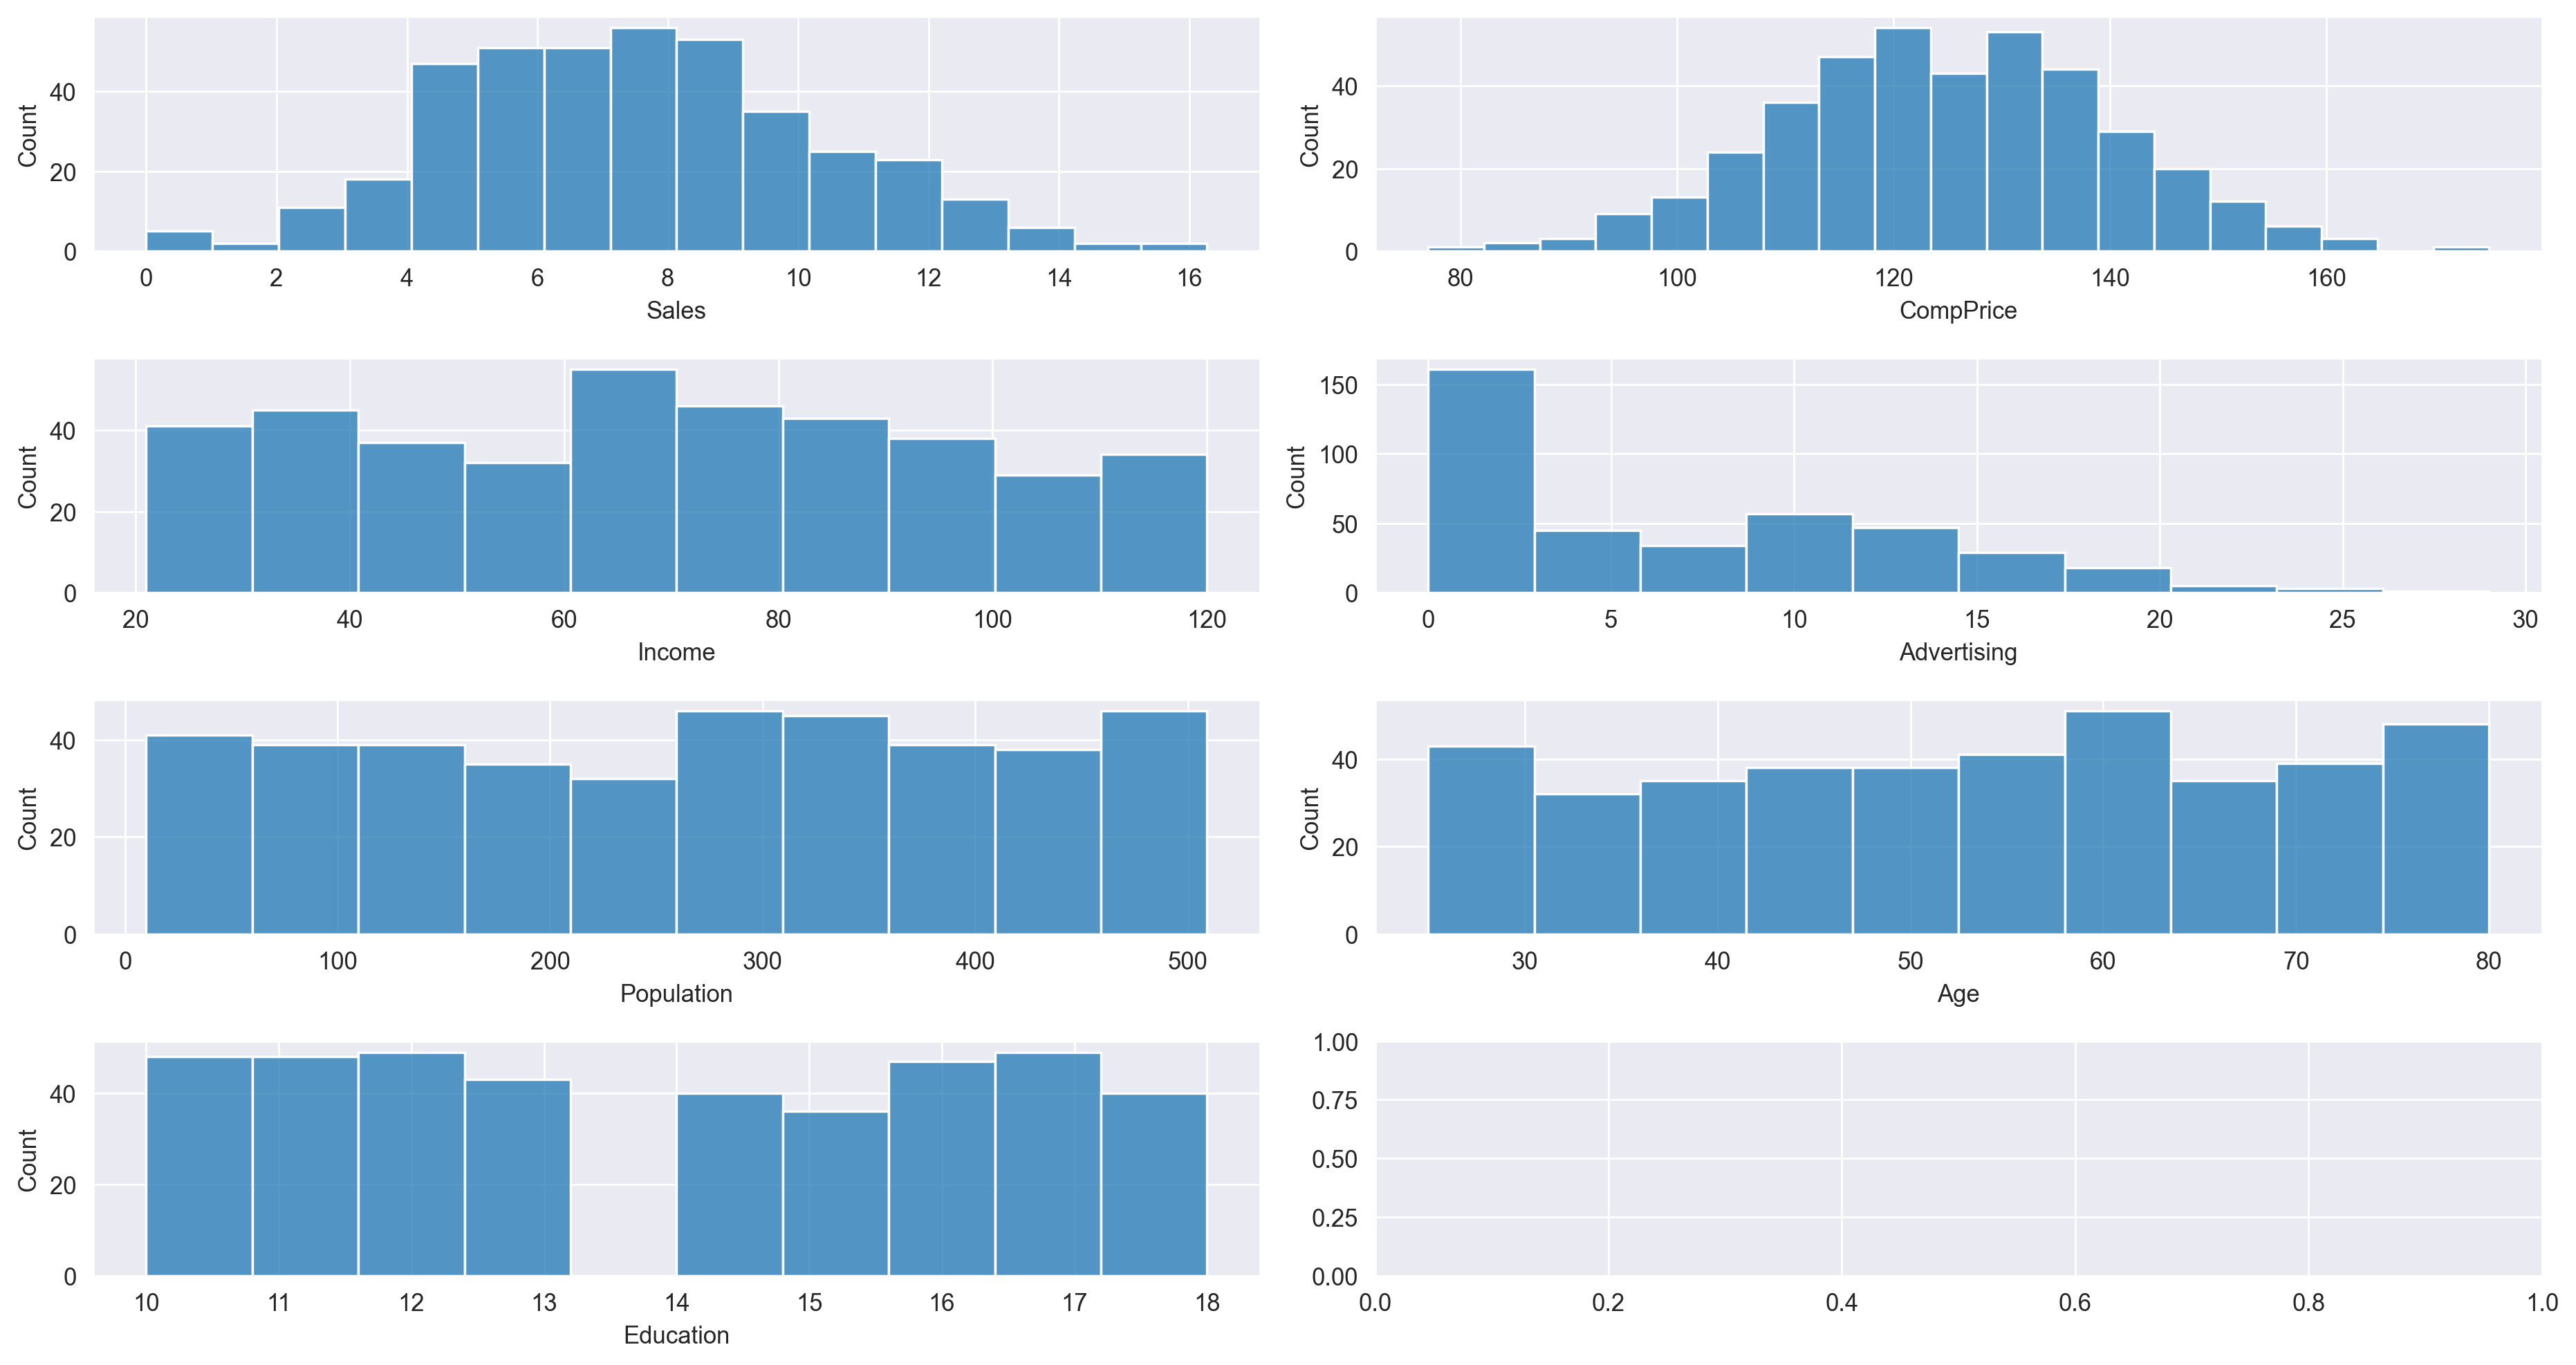

In [61]:
fig, ax = plt.subplots(4, 2)

sns.histplot(cd['Sales'], ax = ax[0, 0])
sns.histplot(cd['CompPrice'], ax = ax[0, 1])
sns.histplot(cd['Income'], ax = ax[1, 0])
sns.histplot(cd['Advertising'], ax = ax[1, 1])
sns.histplot(cd['Population'], ax = ax[2, 0])
sns.histplot(cd['Age'], ax = ax[2, 1])
sns.histplot(cd['Education'], ax = ax[3, 0])

plt.tight_layout()

#### Ploting QQ-Plot

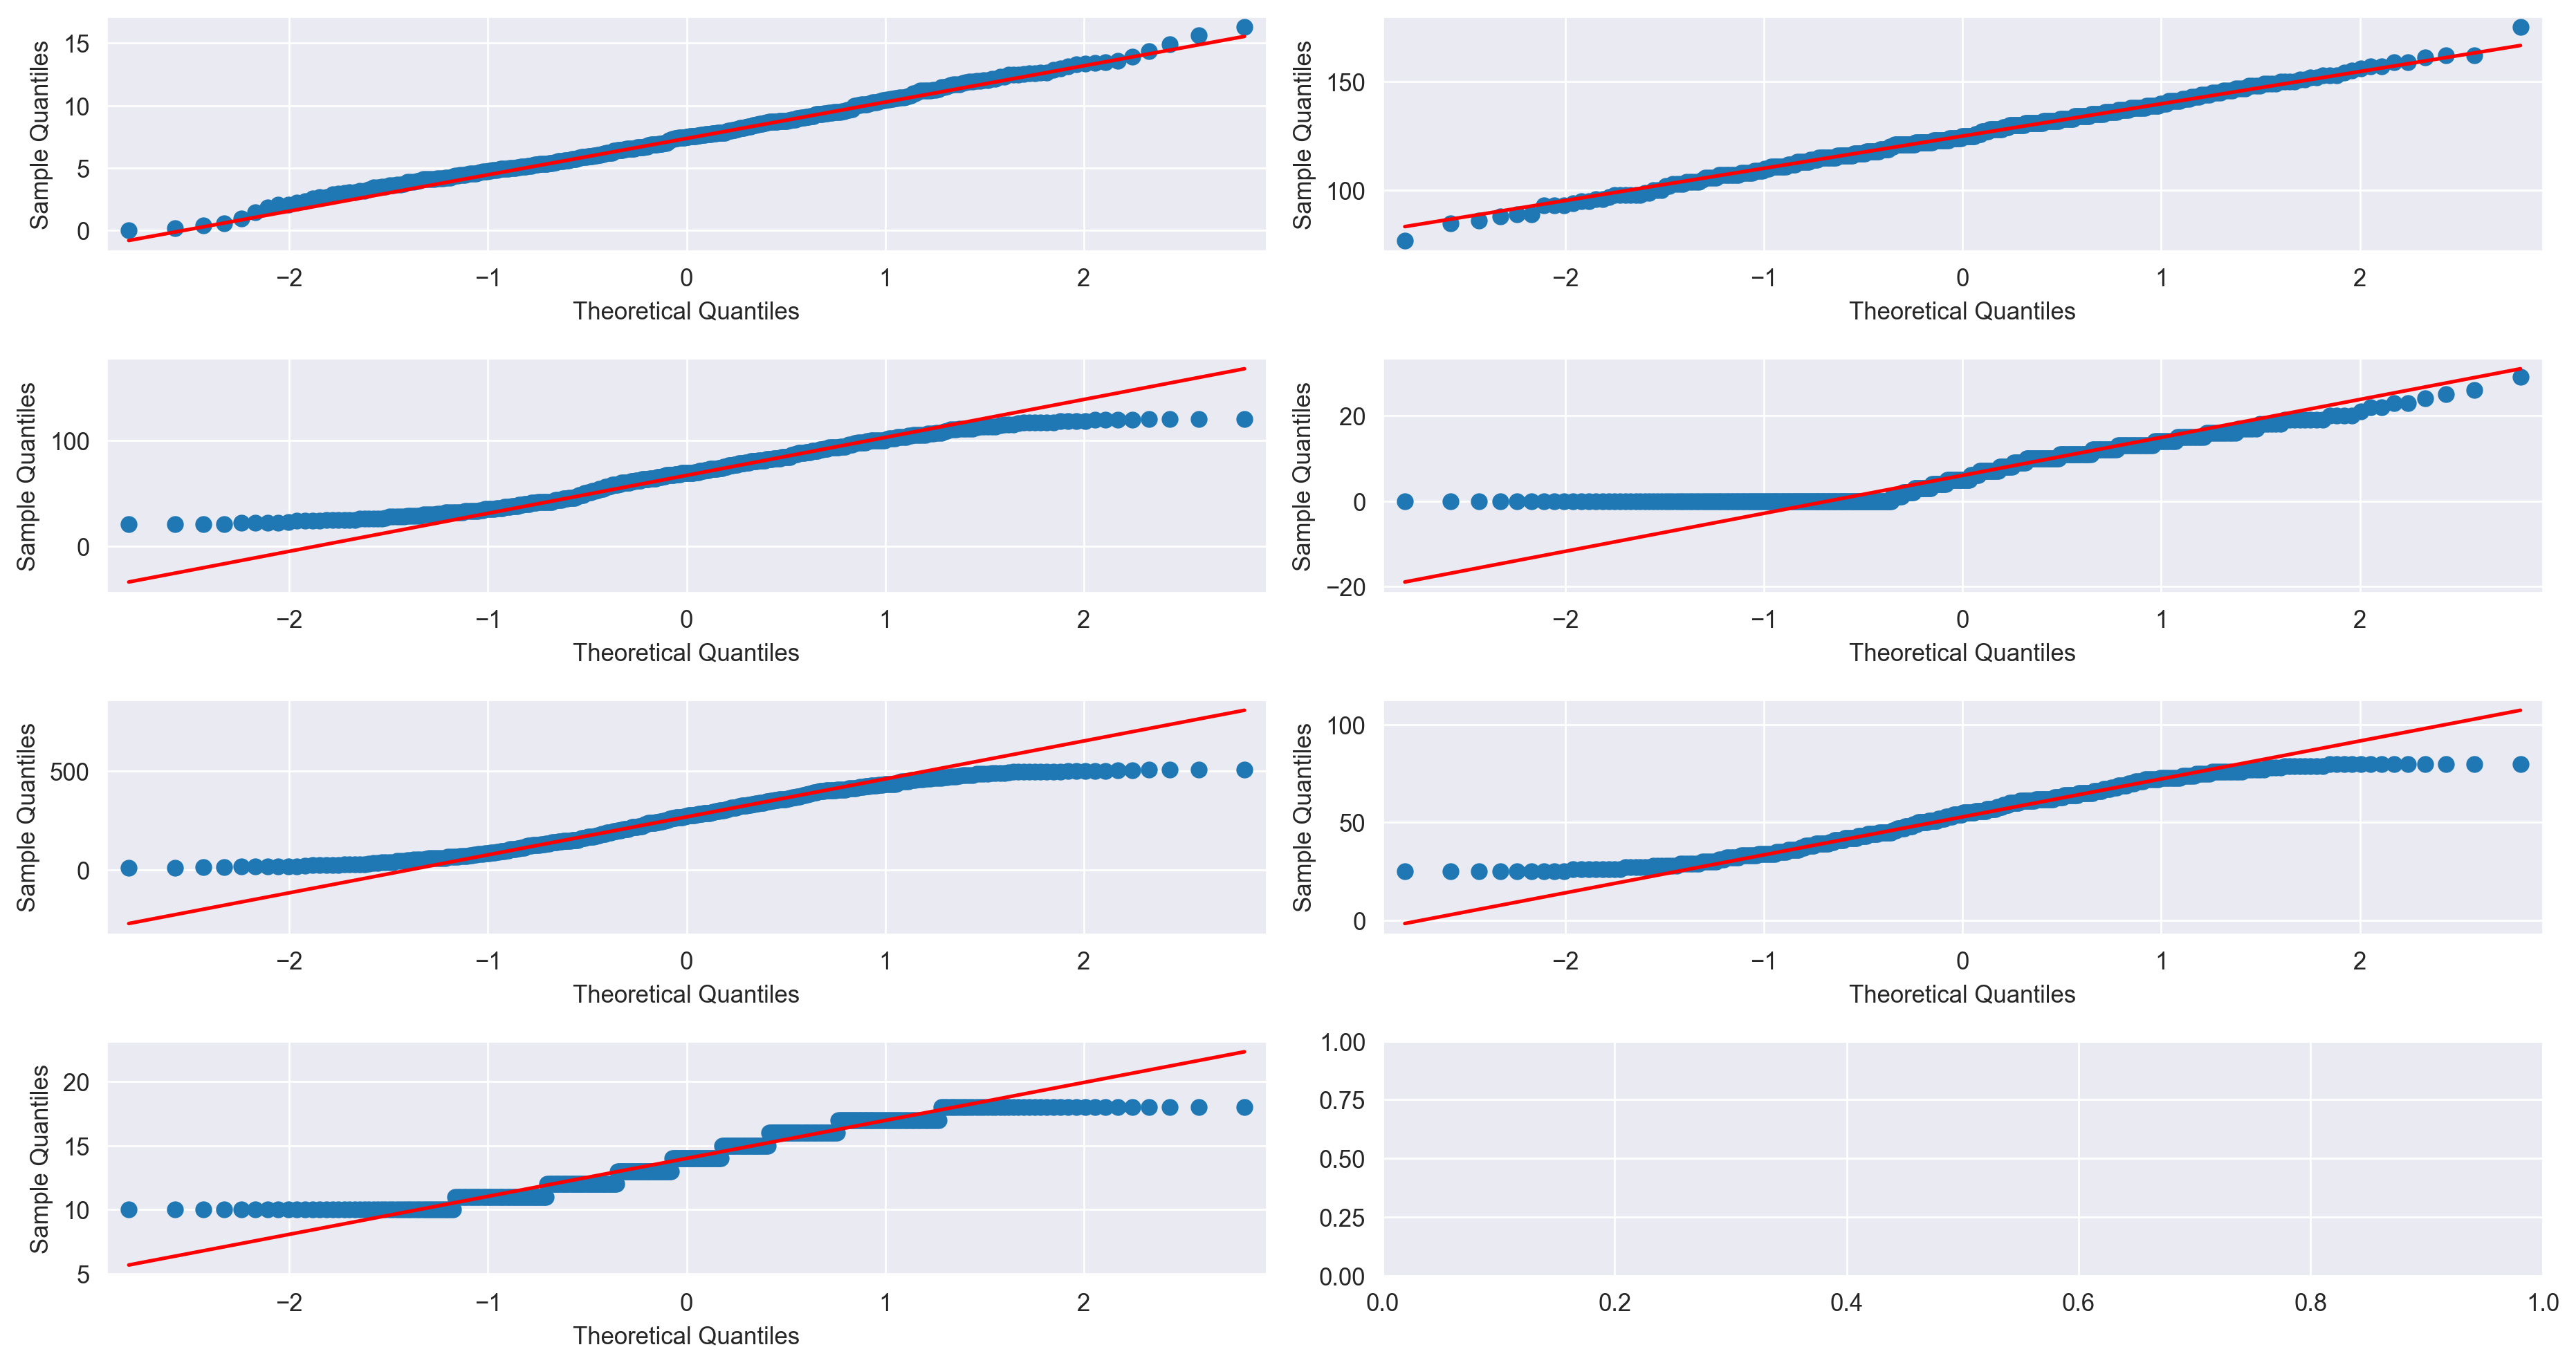

In [62]:
fig, ax = plt.subplots(4, 2)

sm.qqplot(cd['Sales'], ax=ax[0, 0], line='q')
sm.qqplot(cd['CompPrice'], ax = ax[0, 1], line='q')
sm.qqplot(cd['Income'], ax = ax[1, 0], line='q')
sm.qqplot(cd['Advertising'], ax = ax[1, 1], line='q')
sm.qqplot(cd['Population'], ax = ax[2, 0], line='q')
sm.qqplot(cd['Age'], ax = ax[2, 1], line='q')
sm.qqplot(cd['Education'], ax = ax[3, 0], line='q')

plt.tight_layout()


### Correlation Analysis

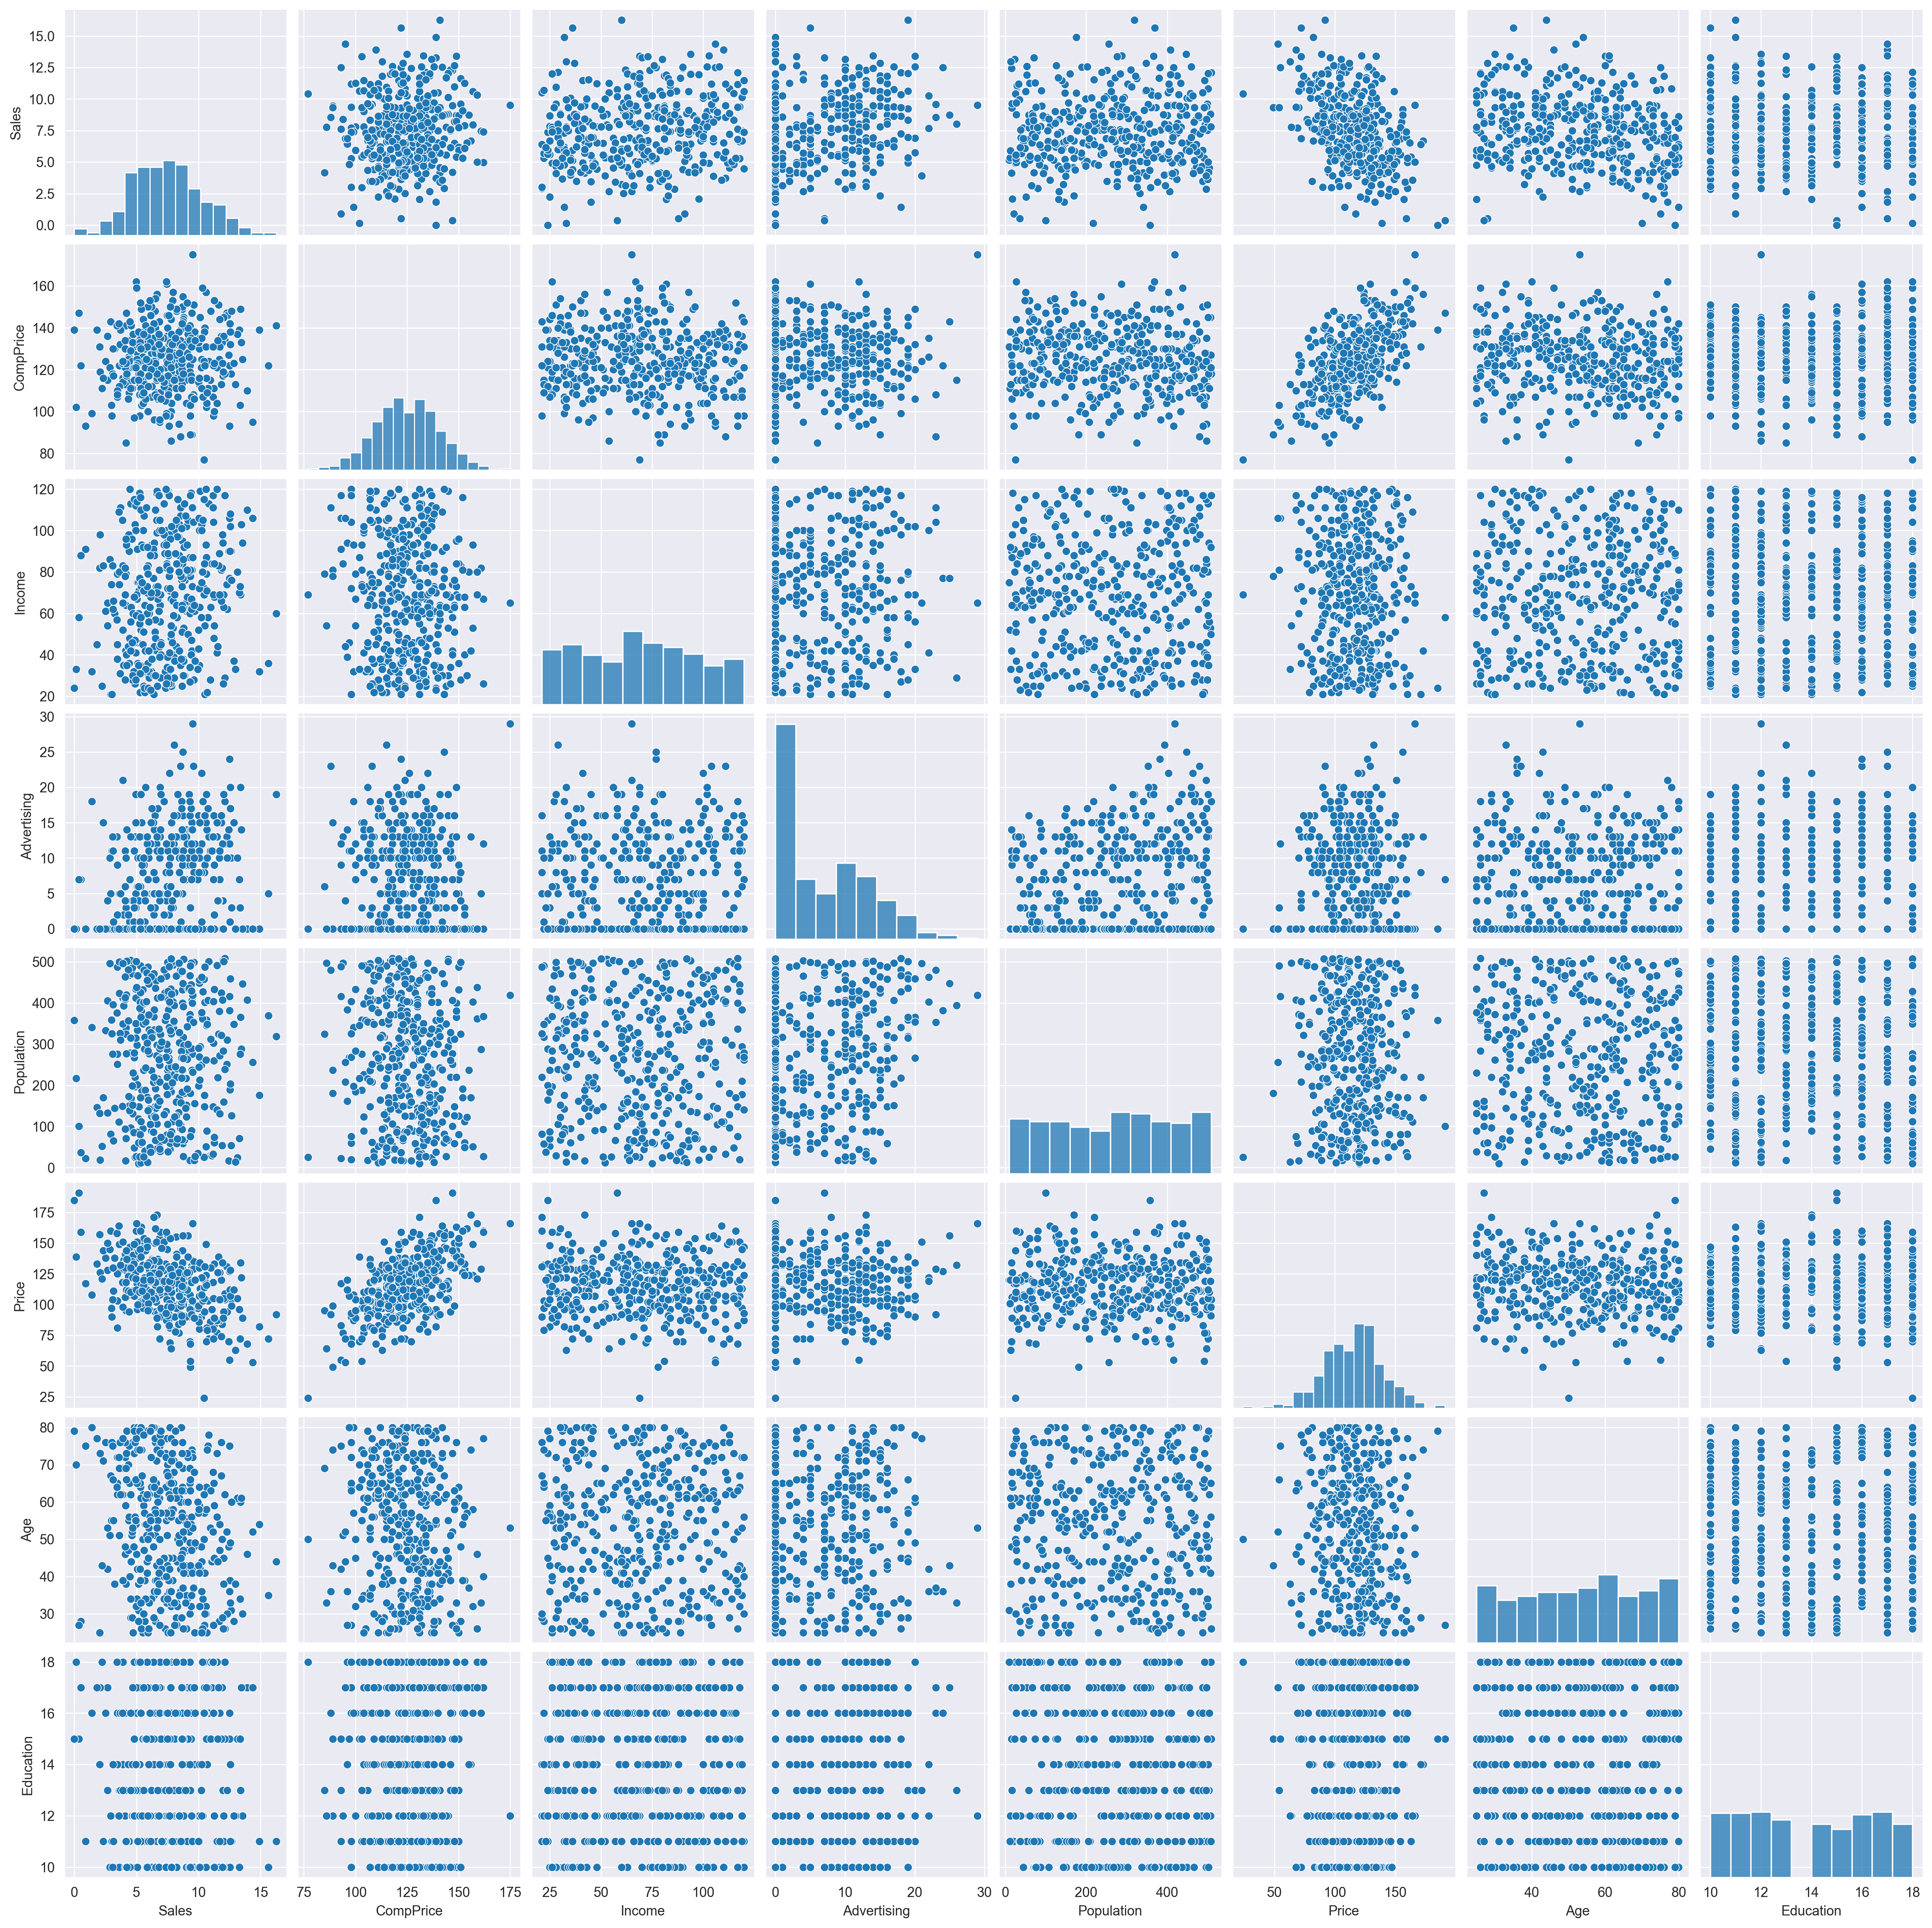

In [63]:
sns.pairplot(data=cd)


<AxesSubplot:>

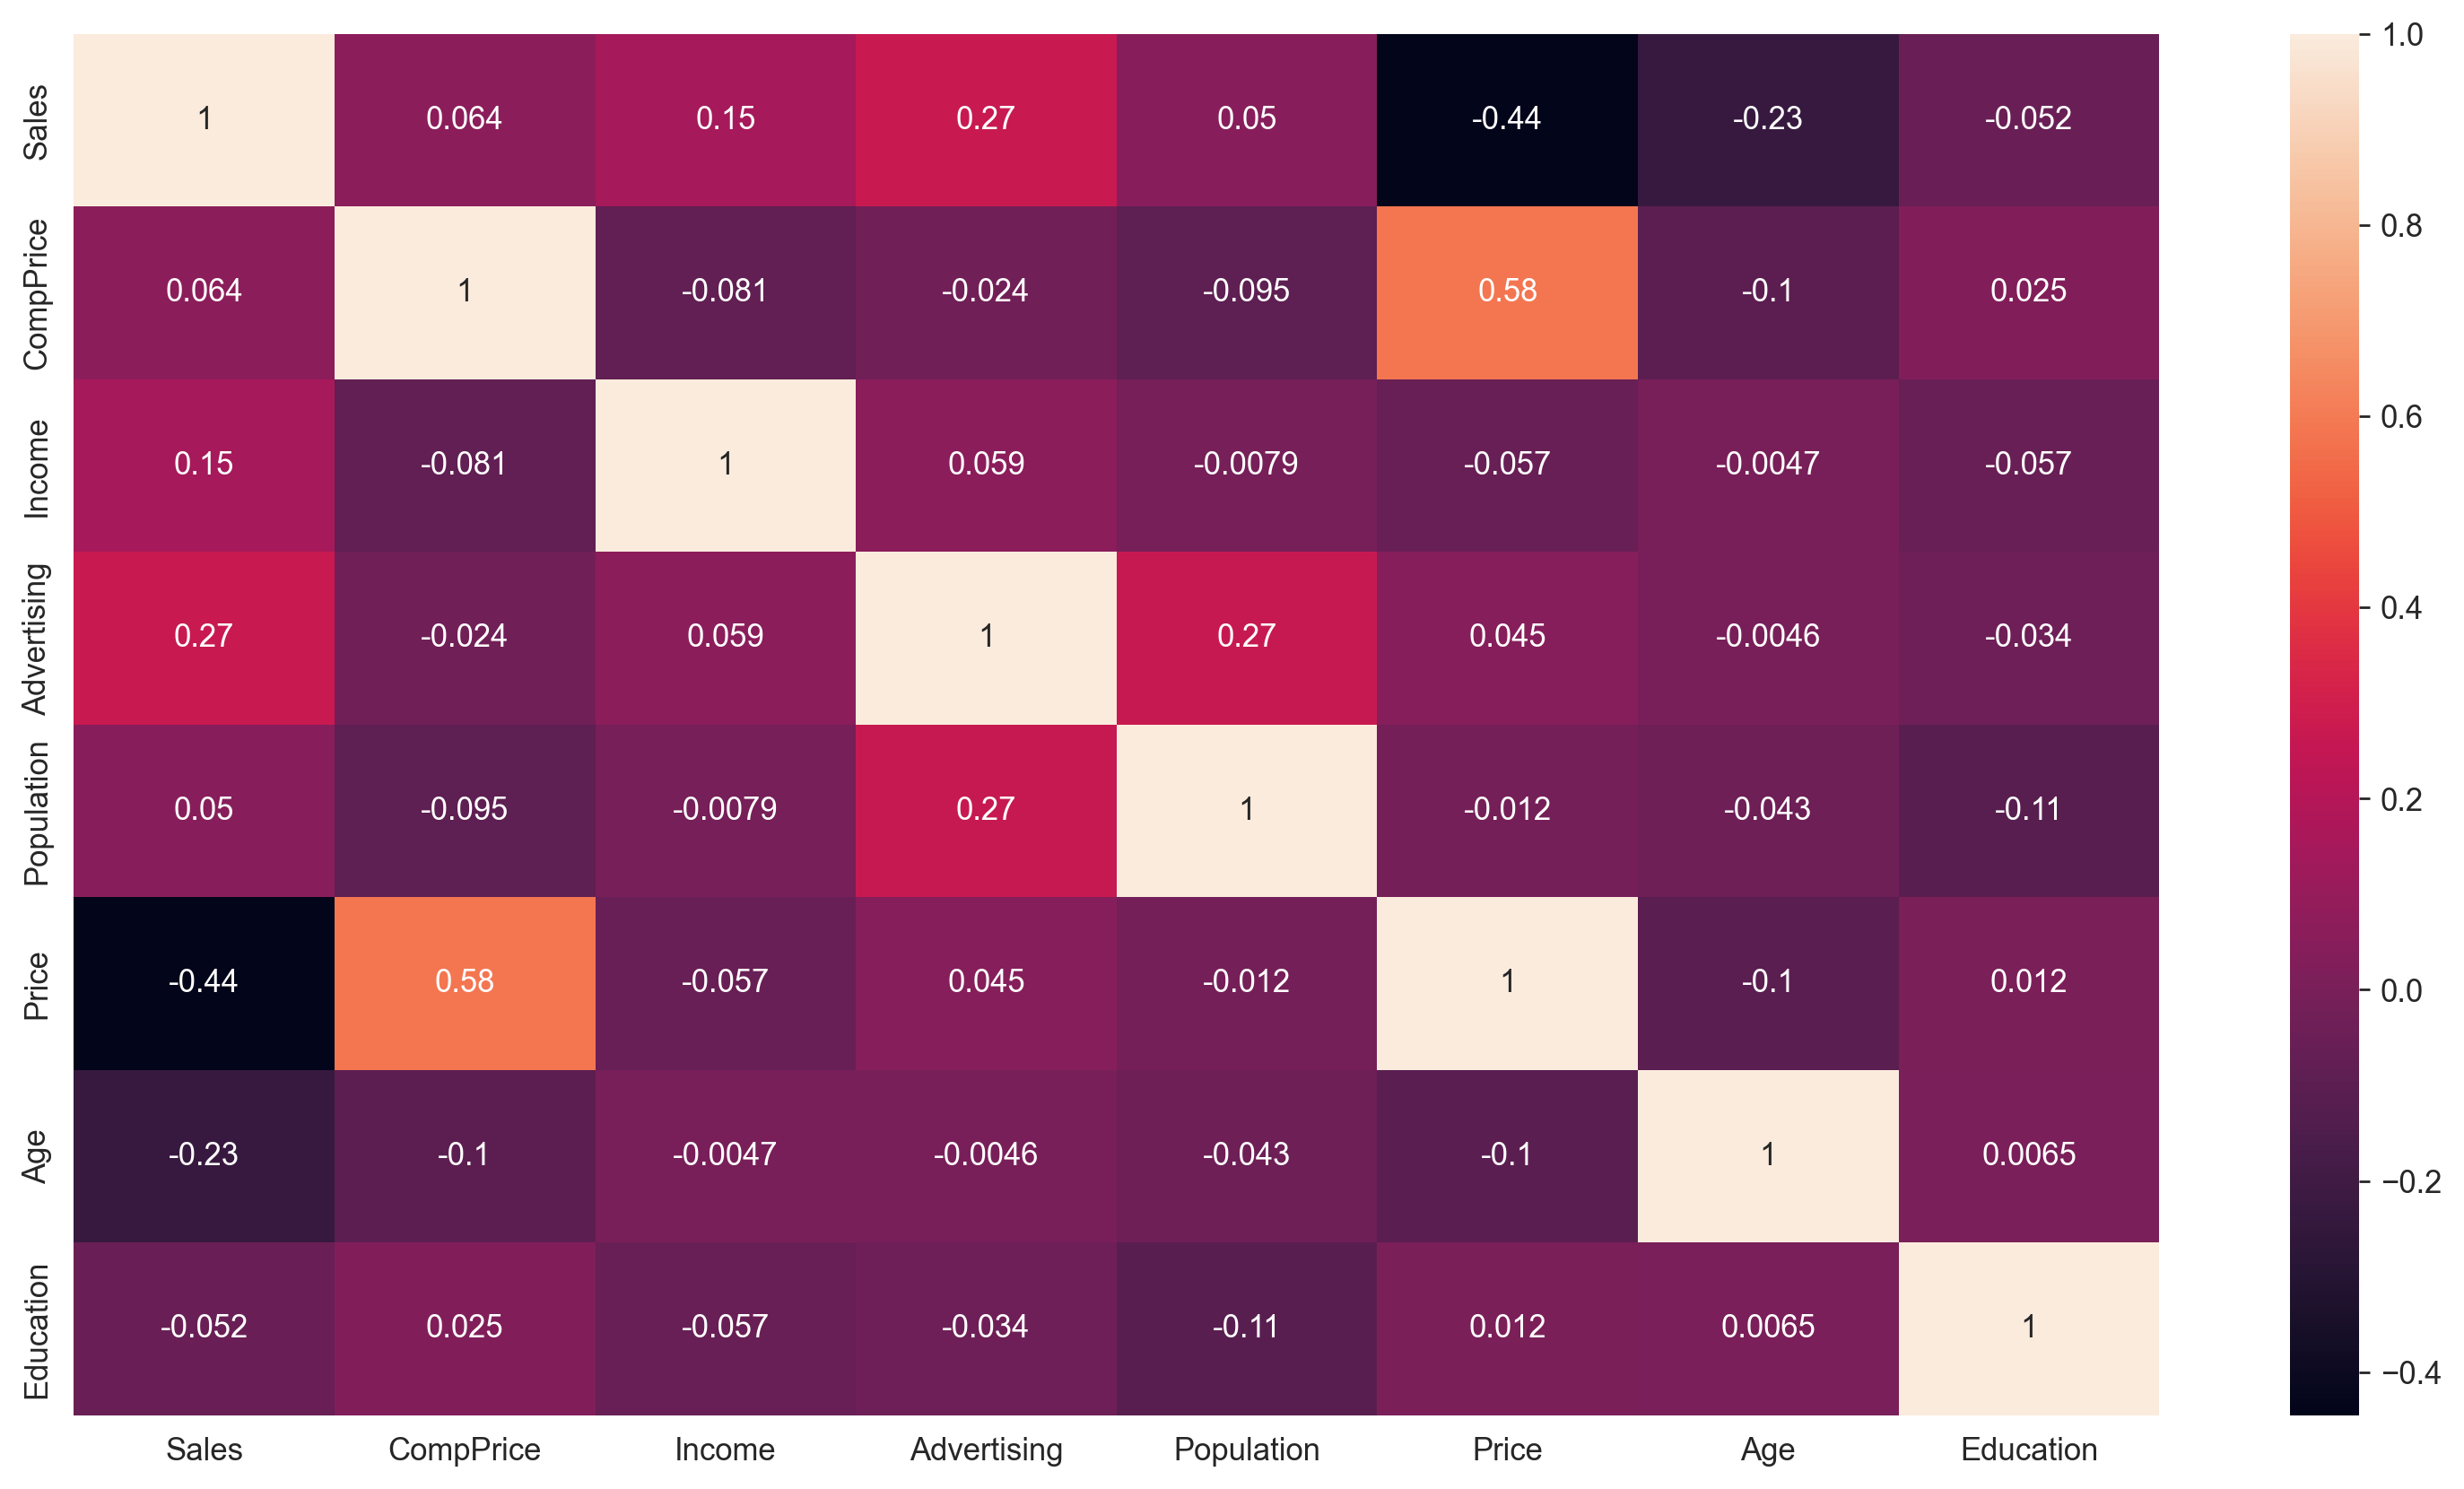

In [64]:
sns.heatmap(cd.corr(), annot=True)

### Converting Categorical Data to Numerical Data

In [65]:
le = LabelEncoder()

#### Converting ShelveLoc Data to Numerical Data

In [66]:
cd['ShelveLoc'] = le.fit_transform(cd['ShelveLoc'])

cd

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          0   42   
1    11.22        111      48           16         260     83          1   65   
2    10.06        113      35           10         269     80          2   59   
3     7.40        117     100            4         466     97          2   55   
4     4.15        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57        138     108           17         203    128          1   33   
396   6.14        139      23            3          37    120          2   55   
397   7.41        162      26           12         368    159          2   40   
398   5.94        100      79            7         284     95          0   50   
399   9.71        134      37            0          27    120          1   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

#### Converting Urban Data to Numerical Data

In [67]:
cd['Urban'] = le.fit_transform(cd['Urban'])

cd

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          0   42   
1    11.22        111      48           16         260     83          1   65   
2    10.06        113      35           10         269     80          2   59   
3     7.40        117     100            4         466     97          2   55   
4     4.15        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57        138     108           17         203    128          1   33   
396   6.14        139      23            3          37    120          2   55   
397   7.41        162      26           12         368    159          2   40   
398   5.94        100      79            7         284     95          0   50   
399   9.71        134      37            0          27    120          1   49   

     Education  Urban   US  
0           17      1  Yes  
1           10      1  Yes  
2           12      1  Yes  
3           14      1  Yes  
4           13      1   No  
..         ...    ...  ...  
395         14      1  Yes  
396         11      0  Yes  
397         18      1  Yes  
398         12      1  Yes  
399         16      1  Yes  

[400 rows x 11 columns]

#### Converting US Data to Numerical Data

In [68]:
cd['US'] = le.fit_transform(cd['US'])

cd

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          0   42   
1    11.22        111      48           16         260     83          1   65   
2    10.06        113      35           10         269     80          2   59   
3     7.40        117     100            4         466     97          2   55   
4     4.15        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57        138     108           17         203    128          1   33   
396   6.14        139      23            3          37    120          2   55   
397   7.41        162      26           12         368    159          2   40   
398   5.94        100      79            7         284     95          0   50   
399   9.71        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
395         14      1   1  
396         11      0   1  
397         18      1   1  
398         12      1   1  
399         16      1   1  

[400 rows x 11 columns]

### Outlier Detection

In [69]:
def outlier_percentage(df):
    for i in range(len(df.columns)):

        q1 = df[df.columns[i]].quantile(0.25)
        q3 = df[df.columns[i]].quantile(0.75)
        iqr = q3-q1

        upper = q3 + (iqr*1.5)
        lower = q1 - (iqr*1.5)

        percentage = (((len(df[df[df.columns[i]] > upper])) +
                      (len(df[df[df.columns[i]] < lower])))/len(df[df.columns[i]]))*100

        print(str(df.columns[i]) + ' : ' + str(percentage) + ' %')


In [70]:
def replace_outlier_extream(st, col):

    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st[col].mask(st[col] > upper, upper, inplace=True)
    st[col].mask(st[col] < lower, lower, inplace=True)


In [71]:
def remove_outlier(st, col):
    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st = st[(st[col] > lower) & (st[col] < upper)]

    return st


#### Outlier Percentage (Before)

In [72]:
outlier_percentage(cd)

Sales : 0.5 %
CompPrice : 0.5 %
Income : 0.0 %
Advertising : 0.0 %
Population : 0.0 %
Price : 1.25 %
ShelveLoc : 0.0 %
Age : 0.0 %
Education : 0.0 %
Urban : 0.0 %
US : 0.0 %


#### Removing Outlier In CompPrice Column

In [73]:
pe.box(cd['CompPrice'], orientation='h')

In [74]:
cd = remove_outlier(cd, 'CompPrice')

In [75]:
pe.box(cd['CompPrice'], orientation='h')

In [76]:
lost_record()

We lost 0.75 % data


#### Replacing Outlier In Price Column

In [77]:
pe.box(cd['Price'], orientation='h')

In [78]:
cd = remove_outlier(cd, 'Price')

In [79]:
pe.box(cd['Price'], orientation='h')

In [80]:
lost_record()

We lost 1.75 % data


#### Outlier Percentage (After)

In [81]:
outlier_percentage(cd)

Sales : 0.5089058524173028 %
CompPrice : 0.0 %
Income : 0.0 %
Advertising : 0.0 %
Population : 0.0 %
Price : 0.5089058524173028 %
ShelveLoc : 0.0 %
Age : 0.0 %
Education : 0.0 %
Urban : 0.0 %
US : 0.0 %


#### Reindexing Columns

In [82]:
cd.reset_index(inplace=True)
cd.drop(columns='index', inplace=True)

cd

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          0   42   
1    11.22        111      48           16         260     83          1   65   
2    10.06        113      35           10         269     80          2   59   
3     7.40        117     100            4         466     97          2   55   
4     4.15        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
388  12.57        138     108           17         203    128          1   33   
389   6.14        139      23            3          37    120          2   55   
390   7.41        162      26           12         368    159          2   40   
391   5.94        100      79            7         284     95          0   50   
392   9.71        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
388         14      1   1  
389         11      0   1  
390         18      1   1  
391         12      1   1  
392         16      1   1  

[393 rows x 11 columns]

## Splitting The Data Into Target and Independent set

In [83]:
x = cd.iloc[:,1:]
y = cd['Sales']

In [84]:
x

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
388        138     108           17         203    128          1   33   
389        139      23            3          37    120          2   55   
390        162      26           12         368    159          2   40   
391        100      79            7         284     95          0   50   
392        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
388         14      1   1  
389         11      0   1  
390         18      1   1  
391         12      1   1  
392         16      1   1  

[393 rows x 10 columns]

### Normalizing The Dataset

In [85]:
sc = StandardScaler()
scaled_x  = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [86]:
scaled_x

CompPrice    Income  Advertising  Population     Price  ShelveLoc  \
0     0.876318  0.154772     0.662544    0.072436  0.184080  -1.563215   
1    -0.964626 -0.737098     1.423444   -0.036114 -1.483654  -0.363325   
2    -0.828260 -1.200871     0.510364    0.024945 -1.618876   0.836564   
3    -0.555528  1.117993    -0.402715    1.361473 -0.852619   0.836564   
4     1.080867 -0.166301    -0.554895    0.506638  0.544672  -1.563215   
..         ...       ...          ...         ...       ...        ...   
388   0.876318  1.403391     1.575624   -0.422826  0.544672  -0.363325   
389   0.944501 -1.628969    -0.554895   -1.549037  0.184080   0.836564   
390   2.512713 -1.521944     0.814724    0.696602  1.941962   0.836564   
391  -1.714641  0.368821     0.053824    0.126711 -0.942767  -1.563215   
392   0.603585 -1.129521    -1.011435   -1.616881  0.184080  -0.363325   

          Age  Education     Urban        US  
0   -0.699432   1.188995  0.647126  0.735647  
1    0.721279  -1.478970  0.647126  0.735647  
2    0.350659  -0.716695  0.647126  0.735647  
3    0.103579   0.045581  0.647126  0.735647  
4   -0.946512  -0.335557  0.647126 -1.359348  
..        ...        ...       ...       ...  
388 -1.255362   0.045581  0.647126  0.735647  
389  0.103579  -1.097833 -1.545293  0.735647  
390 -0.822972   1.570133  0.647126  0.735647  
391 -0.205271  -0.716695  0.647126  0.735647  
392 -0.267041   0.807857  0.647126  0.735647  

[393 rows x 10 columns]

### Splitting The Data Into Training And Testing Set

In [87]:
xtrain,xtest,ytrain,ytest = train_test_split(scaled_x,y,train_size=0.75,random_state=1)

In [88]:
xtrain

CompPrice    Income  Advertising  Population     Price  ShelveLoc  \
380   1.149050  0.154772     1.119084   -0.185371 -0.041289   0.836564   
107  -0.691894 -0.130626    -1.011435   -0.327844 -1.168137   0.836564   
214  -0.623711  0.368821     1.879984    0.635542  0.003785  -0.363325   
98   -0.828260  0.012073     0.662544   -1.162326 -0.446954   0.836564   
391  -1.714641  0.368821     0.053824    0.126711 -0.942767  -1.563215   
..         ...       ...          ...         ...       ...        ...   
203  -2.669204 -0.523049    -1.011435    1.571790 -2.340058  -1.563215   
255   0.262670  1.724465     0.206004    0.913703 -0.672324  -1.563215   
72    1.694515 -0.023602    -0.250535   -0.952009  0.905263   0.836564   
235   2.308163  0.404496    -1.011435    0.655895  0.229154   0.836564   
37   -0.282795 -0.986822    -0.250535    0.995115 -0.266659   0.836564   

          Age  Education     Urban        US  
380  1.215439   0.045581 -1.545293  0.735647  
107  0.412429   1.188995 -1.545293 -1.359348  
214  0.288889   1.188995  0.647126  0.735647  
98   1.400749  -0.716695 -1.545293  0.735647  
391 -0.205271  -0.716695  0.647126  0.735647  
..        ...        ...       ...       ...  
203 -1.255362  -0.716695  0.647126 -1.359348  
255 -1.070052  -1.478970  0.647126  0.735647  
72   0.659509  -0.335557 -1.545293  0.735647  
235 -1.687752   1.570133  0.647126 -1.359348  
37   0.041809  -1.478970  0.647126  0.735647  

[294 rows x 10 columns]

## Preparing Model From The Dataset

### Creating Model With Default Value

In [91]:
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

#### Evaluating The Model

##### Creating Classification Report

In [93]:
print(r2_score(ytest,ypred))

0.6774249854686059


##### Comparing Training And Testing Accuracy

In [94]:
print('Training Accuracy of are Model is : ' + str(rf.score(xtrain,ytrain)))
print('Testing Accuracy of are Model is : ' + str(rf.score(xtest, ytest)))

Training Accuracy of are Model is : 0.9575105477741802
Testing Accuracy of are Model is : 0.6774249854686059


### Performing Hyperparameter Tuning

In [111]:
param_grid = {
	'n_estimators': [25, 50, 100, 150],
    'criterion' : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
	'max_features': ['sqrt', 'log2', None],
	'max_depth': [3, 6, 9],
	'max_leaf_nodes': [3, 6, 9],
}


In [112]:
random_search = RandomizedSearchCV(RandomForestRegressor(), param_grid)
random_search.fit(xtrain, ytrain)
print(random_search.best_estimator_)

RandomForestRegressor(criterion='friedman_mse', max_depth=9, max_features=None,
                      max_leaf_nodes=6, n_estimators=25)


### Creating Final Model With Hyperparameter Value

In [114]:
dt_final = RandomForestRegressor(criterion='friedman_mse', max_depth=9, max_features=None,max_leaf_nodes=6, n_estimators=25)
dt_final.fit(xtrain,ytrain)
ypred = dt_final.predict(xtest)

#### Evaluating The Model

##### Creating Classification Report

In [115]:
print(r2_score(ytest,ypred))

0.47564998632979716


##### Comparing Training And Testing Accuracy

In [116]:
print('Training Accuracy of are Model is : ' + str(dt_final.score(xtrain,ytrain)))
print('Testing Accuracy of are Model is : ' + str(dt_final.score(xtest, ytest)))

Training Accuracy of are Model is : 0.6094571852161512
Testing Accuracy of are Model is : 0.47564998632979716
